In [7]:
import anndata as ad
import scanpy as sc
sc_file="D:\pythonplaces\MACD_github\Datasets\Real_datasets\dataset2\scRNA.h5ad"
adata1 = ad.read_h5ad(sc_file)
adata=adata1.copy()
adata


AnnData object with n_obs × n_vars = 14989 × 11740
    obs: 'n_genes', 'cell_types', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pred_cell_types', 'doublet_scores', 'doublet_predictions', 'MS', 'louvain_r0.5', 'louvain_r0.7', 'louvain_r1.0', 'leiden_r0.5', 'leiden_r0.7', 'leiden_r1.0', 'DC_A', 'DC_B', 'mono_1', 'mono_2', 'louvain_sub_0.1', 'louvain_sub_0.2', 'louvain_sub_0.3', 'louvain_sub', 'louvain_sub_1', 'louvain_sub_2', 'louvain_sub_3', 'SCANVI_pred_cell_types', 'SCVI_pred_cell_types', 'broad_cell_types'
    var: 'gene_ids-0', 'genome-0', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_r1.0_colors', 'louvain', 'louvain_r0.5_colors', 'louvain_r0.7_colors', 'louvain_r1.0_colors', 'louvain_sub_0.2_colors', 'louvain_sub_0.3_colors', 'louvain_sub_1_colors', 'neighbors', 'p

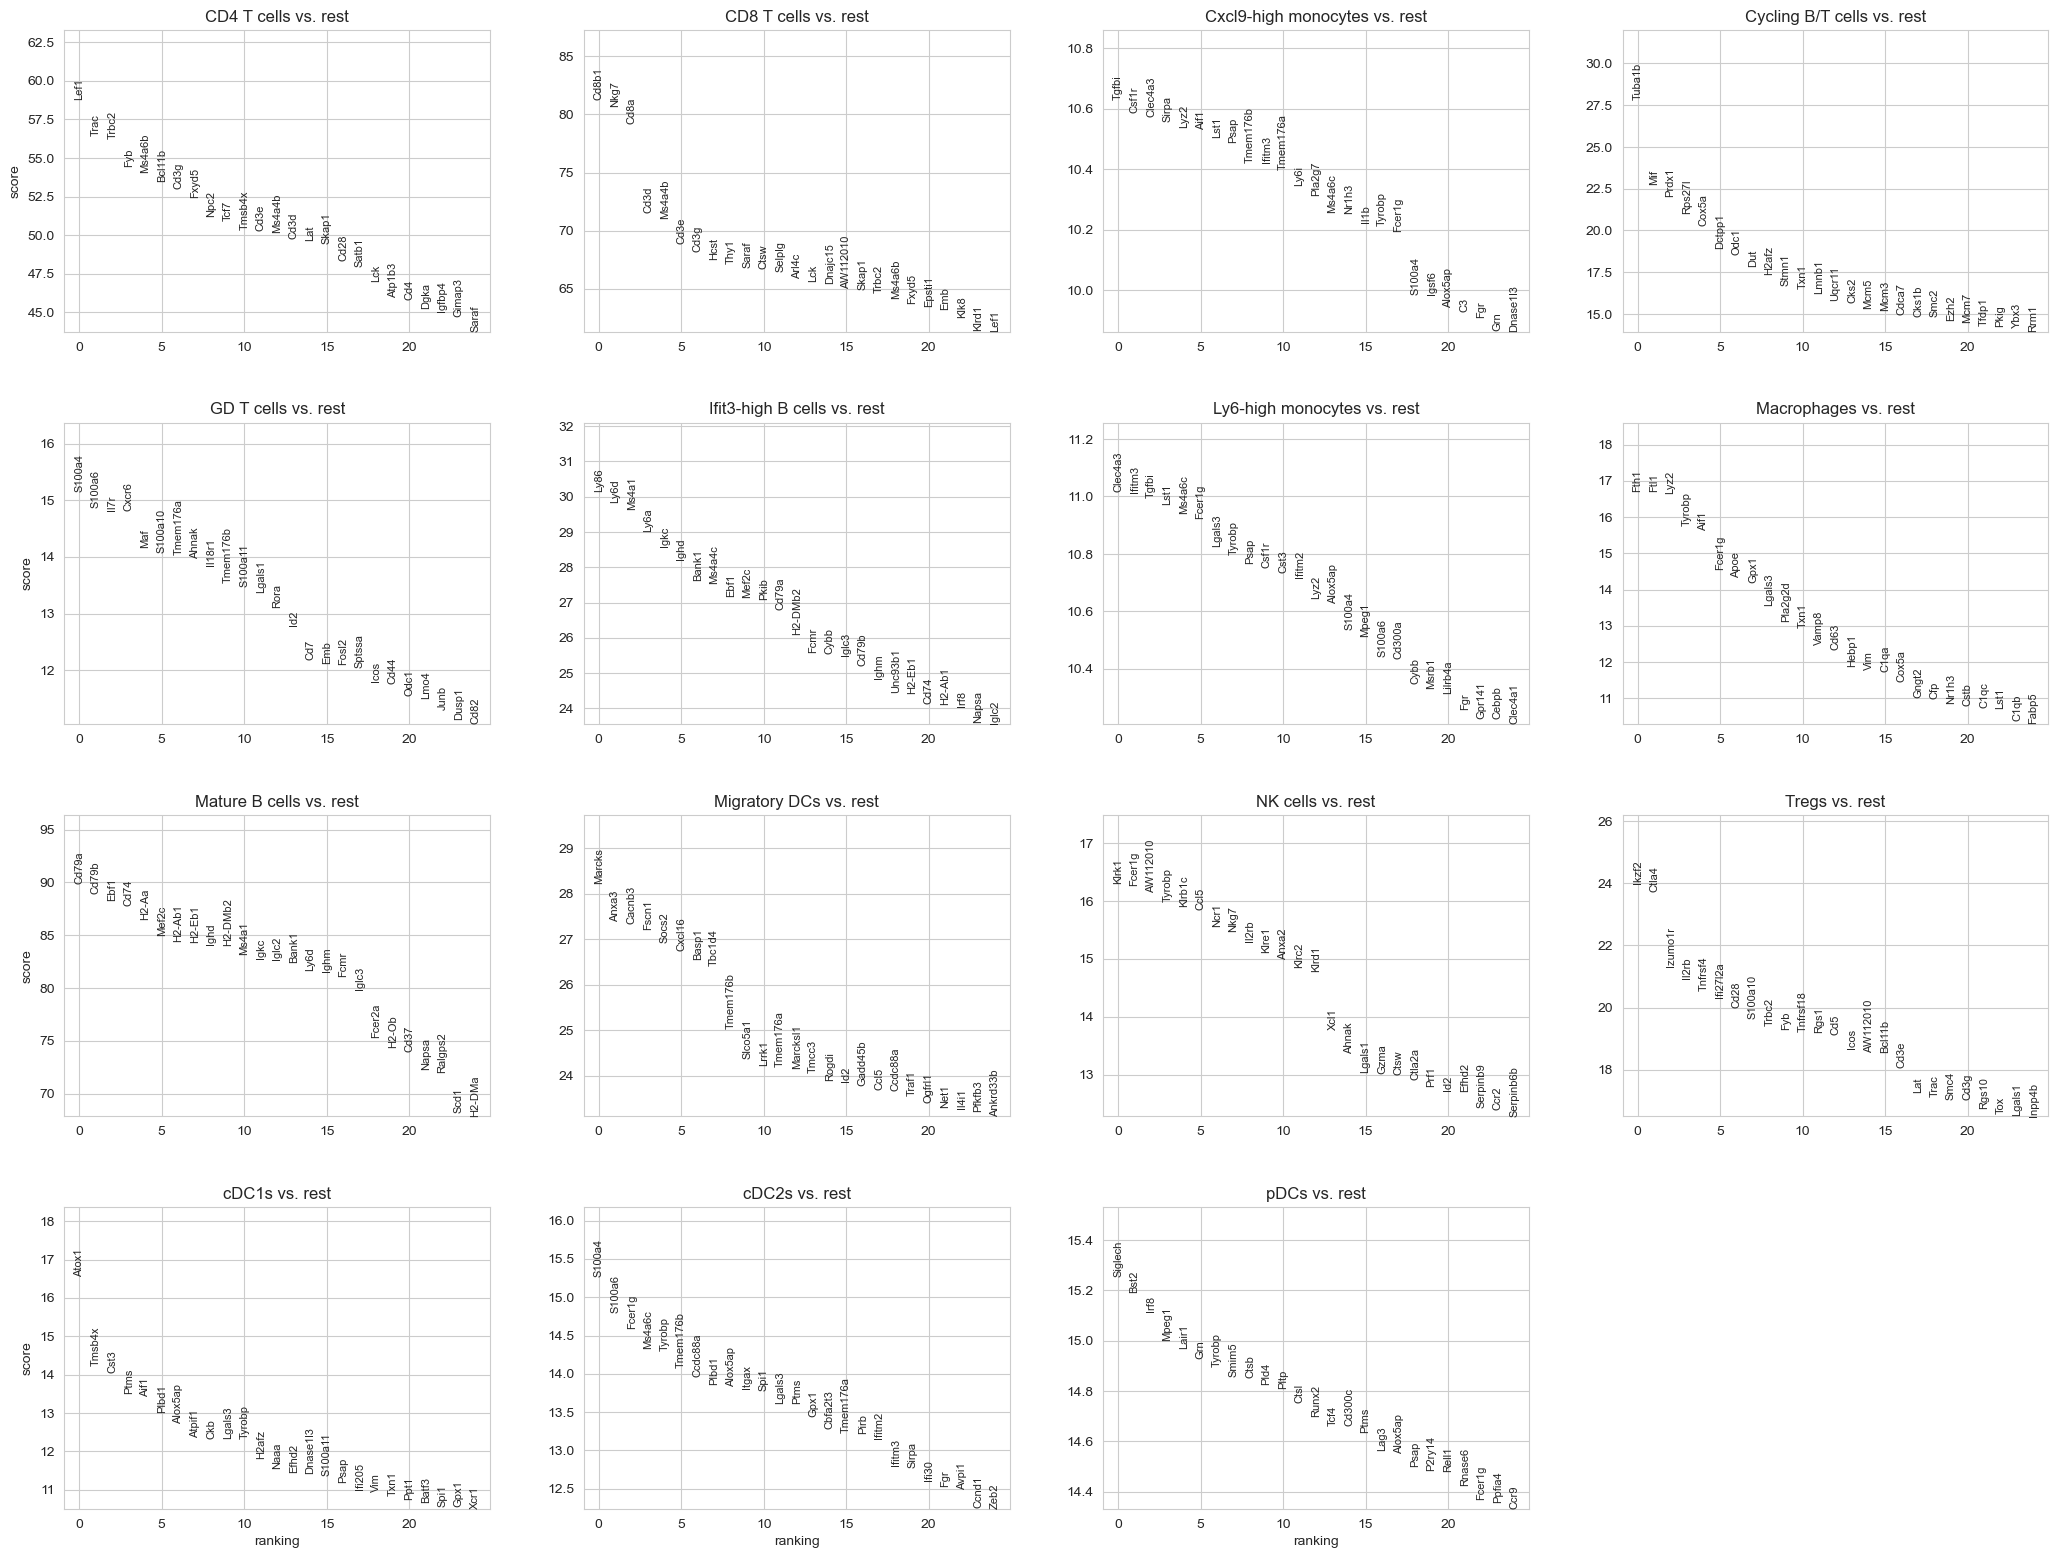

CD4 T cells:['Lef1' 'Trac' 'Trbc2' 'Fyb' 'Ms4a6b' 'Bcl11b' 'Cd3g' 'Fxyd5' 'Npc2'
 'Tcf7' 'Tmsb4x' 'Cd3e' 'Ms4a4b' 'Cd3d' 'Lat' 'Skap1' 'Cd28' 'Satb1' 'Lck'
 'Atp1b3']
CD8 T cells:['Cd8b1' 'Nkg7' 'Cd8a' 'Cd3d' 'Ms4a4b' 'Cd3e' 'Cd3g' 'Hcst' 'Thy1' 'Saraf'
 'Ctsw' 'Selplg' 'Arl4c' 'Lck' 'Dnajc15' 'AW112010' 'Skap1' 'Trbc2'
 'Ms4a6b' 'Fxyd5']
Cxcl9-high monocytes:['Tgfbi' 'Csf1r' 'Clec4a3' 'Sirpa' 'Lyz2' 'Aif1' 'Lst1' 'Psap' 'Tmem176b'
 'Ifitm3' 'Tmem176a' 'Ly6i' 'Pla2g7' 'Ms4a6c' 'Nr1h3' 'Il1b' 'Tyrobp'
 'Fcer1g' 'S100a4' 'Igsf6']
Cycling B/T cells:['Tuba1b' 'Mif' 'Prdx1' 'Rps27l' 'Cox5a' 'Dctpp1' 'Odc1' 'Dut' 'H2afz'
 'Stmn1' 'Txn1' 'Lmnb1' 'Uqcr11' 'Cks2' 'Mcm5' 'Mcm3' 'Cdca7' 'Cks1b'
 'Smc2' 'Ezh2']
GD T cells:['S100a4' 'S100a6' 'Il7r' 'Cxcr6' 'Maf' 'S100a10' 'Tmem176a' 'Ahnak'
 'Il18r1' 'Tmem176b' 'S100a11' 'Lgals1' 'Rora' 'Id2' 'Cd7' 'Emb' 'Fosl2'
 'Sptssa' 'Icos' 'Cd44']
Ifit3-high B cells:['Ly86' 'Ly6d' 'Ms4a1' 'Ly6a' 'Igkc' 'Ighd' 'Bank1' 'Ms4a4c' 'Ebf1'
 'Mef2c' 'Pkib' 'Cd79a' 'H

In [7]:
# print(adata.obs['celltype_new'])
adata=ad.read_h5ad('D:\pythonplaces\MACD_github\Datasets\preproced_data\dataset2\Scdata_filter.h5ad')
sc.pp.normalize_total(adata, target_sum=1e4) # 不要和log顺序搞反了 ，这个是去文库的
sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, 'cell_types', method='wilcoxon')
# 绘制差异表达基因结果
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_genes = {group: result['names'][group][:20] for group in groups}

for group, genes in top_genes.items():
    print(f"{group}:{genes}")

In [8]:
for group, genes in top_genes.items():
    print(f"{group}:{genes}")

CD4 T cells:['Lef1' 'Trac' 'Trbc2' 'Fyb' 'Ms4a6b' 'Bcl11b' 'Cd3g' 'Fxyd5' 'Npc2'
 'Tcf7' 'Tmsb4x' 'Cd3e' 'Ms4a4b' 'Cd3d' 'Lat' 'Skap1' 'Cd28' 'Satb1' 'Lck'
 'Atp1b3']
CD8 T cells:['Cd8b1' 'Nkg7' 'Cd8a' 'Cd3d' 'Ms4a4b' 'Cd3e' 'Cd3g' 'Hcst' 'Thy1' 'Saraf'
 'Ctsw' 'Selplg' 'Arl4c' 'Lck' 'Dnajc15' 'AW112010' 'Skap1' 'Trbc2'
 'Ms4a6b' 'Fxyd5']
Cxcl9-high monocytes:['Tgfbi' 'Csf1r' 'Clec4a3' 'Sirpa' 'Lyz2' 'Aif1' 'Lst1' 'Psap' 'Tmem176b'
 'Ifitm3' 'Tmem176a' 'Ly6i' 'Pla2g7' 'Ms4a6c' 'Nr1h3' 'Il1b' 'Tyrobp'
 'Fcer1g' 'S100a4' 'Igsf6']
Cycling B/T cells:['Tuba1b' 'Mif' 'Prdx1' 'Rps27l' 'Cox5a' 'Dctpp1' 'Odc1' 'Dut' 'H2afz'
 'Stmn1' 'Txn1' 'Lmnb1' 'Uqcr11' 'Cks2' 'Mcm5' 'Mcm3' 'Cdca7' 'Cks1b'
 'Smc2' 'Ezh2']
GD T cells:['S100a4' 'S100a6' 'Il7r' 'Cxcr6' 'Maf' 'S100a10' 'Tmem176a' 'Ahnak'
 'Il18r1' 'Tmem176b' 'S100a11' 'Lgals1' 'Rora' 'Id2' 'Cd7' 'Emb' 'Fosl2'
 'Sptssa' 'Icos' 'Cd44']
Ifit3-high B cells:['Ly86' 'Ly6d' 'Ms4a1' 'Ly6a' 'Igkc' 'Ighd' 'Bank1' 'Ms4a4c' 'Ebf1'
 'Mef2c' 'Pkib' 'Cd79a' 'H

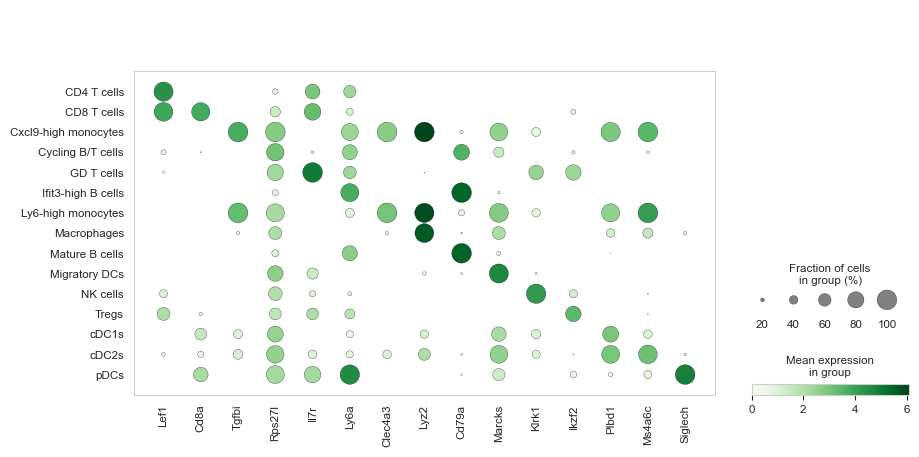

In [12]:
# adata=ad.read_h5ad('D:\pythonplaces\MACD_github\Datasets\preproced_data\dataset2\Scdata_filter.h5ad')
selected_genes = {
    'CD4 T cells': ['Lef1'],
    'CD8 T cells': ['Cd8a'],
    'Cxcl9-high monocytes': ['Tgfbi'],
    'Cycling B/T cells': ['Rps27l'],
    'GD T cells': ['Il7r'],
    'Ifit3-high B cells': ['Ly6a'],
    'Ly6-high monocytes': ['Clec4a3'],
    'Macrophages': ['Lyz2'],
    'Mature B cells': ['Cd79a'],
    'Migratory DCs': ['Marcks'],
    'NK cells': ['Klrk1'],
    'Tregs': ['Ikzf2'],
    'cDC1s': ['Plbd1'],
    'cDC2s': ['Ms4a6c'],
    'pDCs': ['Siglech']
}
import matplotlib.pyplot as plt
import scanpy as sc

# 提取表达数据
genes_to_plot = [gene for genes in selected_genes.values() for gene in genes]

# 创建adata_sub的副本，以防止修改原数据
adata_sub = adata[:, genes_to_plot].copy()

# 检查'cell_types'列是否存在
if 'cell_types' not in adata.obs.columns:
    raise ValueError("'cell_types' column is not found in adata.obs")

# 去除可能的空格并统一细胞类型标签
adata.obs['cell_types'] = adata.obs['cell_types'].str.strip()

# 创建一个新的图形
fig, ax = plt.subplots(figsize=(10, 5))

# 使用scanpy绘制DotPlot，并返回轴对象
sc.pl.dotplot(
    adata_sub, 
    var_names=genes_to_plot, 
    groupby='cell_types',  # 根据细胞类型进行分组
    cmap='Greens',  # 可以选择其他配色方案，如'viridis', 'coolwarm'
    dot_max=1, 
    dot_min=0.1, 
    ax=ax,  # 在ax上绘制
    show=False  # 禁止自动显示图形
)

# 保存图形
# plt.savefig("D:/pythonplaces/MACD_github/img/dataset2/spatial_composition_plots_maker.pdf", format="pdf", bbox_inches="tight")

# 显示图形
plt.show()


D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


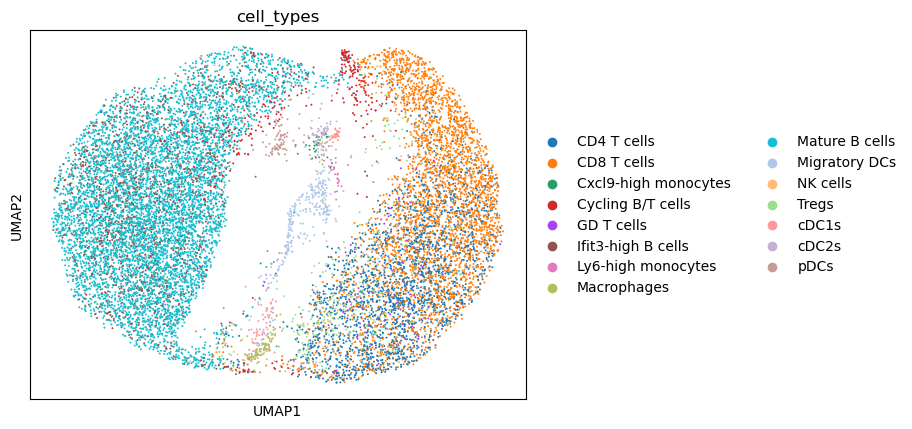

In [11]:
import scanpy as sc
import matplotlib.pyplot as plt
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=40)
# Run UMAP on the data
sc.tl.umap(adata)

# Plot the UMAP, without immediately displaying it
sc.pl.umap(adata, color='cell_types')
plt.gcf().savefig("D:/pythonplaces/MACD_github/img/dataset2/scRNA_umap_plot.pdf", format="pdf")
plt.close()

In [10]:
import scanpy as sc
import os
import matplotlib.pyplot as plt

# Run UMAP
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=40)
sc.tl.umap(adata)

# Check if 'cell_types' exists in adata.obs
if 'cell_types' in adata.obs:
    # Print the unique values in 'cell_types' for debugging
    print(f"adata.obs['cell_types'] values: {adata.obs['cell_types'].unique()}")

    # Create output directory if it doesn't exist
    output_dir = "D:/pythonplaces/MACD_github/img/dataset2/"
    os.makedirs(output_dir, exist_ok=True)

    # Create the UMAP plot
    sc.pl.umap(adata, color='cell_types', show=False)  # Do not show the plot immediately

    # Save the plot to the output directory
    plt.savefig(os.path.join(output_dir, "scRNA_umap_plot.pdf"), format="pdf")
    plt.close()  # Close the plot to free memory

    # Now add the legend and save the composition plot
    if 'cell_type_colors' in adata.uns:
        color_map = dict(zip(adata.obs['cell_types'].unique(), adata.uns['cell_types_colors']))
        print("Color map:", color_map)
        
        # Create a new plot for the spatial composition
        for cell_type, color in color_map.items():
            plt.scatter([], [], color=color, label=cell_type)  # Empty points for legend

        plt.legend(title="Cell Types", loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
        plt.axis('off')  # Optional: turn off the axis

        # Save the spatial composition plot
        plt.savefig(os.path.join(output_dir, "spatial_composition_plots_cdADDA_tuli_scrna.pdf"), format="pdf", bbox_inches="tight")
        plt.close()  # Close the plot to free memory

else:
    print("'cell_types' not found in adata.obs")


adata.obs['cell_types'] values: ['Tregs', 'Mature B cells', 'CD8 T cells', 'Cycling B/T cells', 'CD4 T cells', ..., 'Migratory DCs', 'pDCs', 'Cxcl9-high monocytes', 'NK cells', 'Ly6-high monocytes']
Length: 15
Categories (15, object): ['CD4 T cells', 'CD8 T cells', 'Cxcl9-high monocytes', 'Cycling B/T cells', ..., 'Tregs', 'cDC1s', 'cDC2s', 'pDCs']


D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


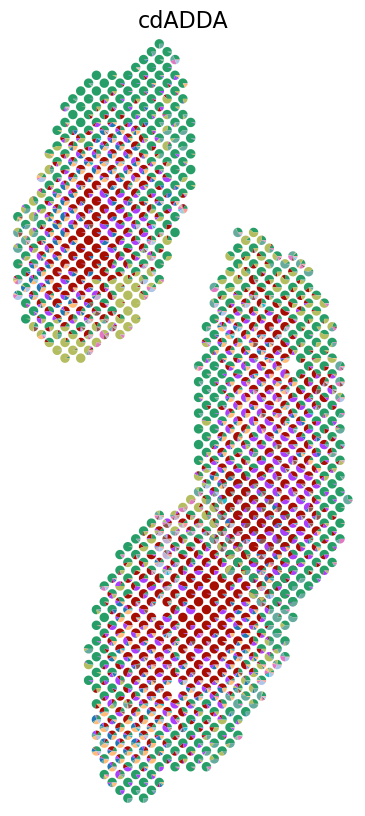

In [9]:
color_map={'Tregs': '#1f77b4', 'Mature B cells': '#279e68', 'CD8 T cells': '#A60D03', 'Cycling B/T cells': '#67AB9F', 'CD4 T cells': '#aa40fc', 'cDC1s': '#8c564b', 'Macrophages': '#e377c2', 'Ifit3-high B cells': '#b5bd61', 'GD T cells': '#17becf', 'cDC2s': '#aec7e8', 'Migratory DCs': '#ffbb78', 'pDCs': '#98df8a', 'Cxcl9-high monocytes': '#ff9896', 'NK cells': '#c5b0d5', 'Ly6-high monocytes': '#c49c94'}
composition_data = pd.read_csv('D:/pythonplaces/MACD_github/MACD1/Result/dataset2/final_pro.csv')

# Ensure composition_data columns are in the correct order
cell_type_columns = composition_data.columns[1:]
# Extract spot coordinates from stadata
coords = pd.DataFrame({
    'x': np.array(stadata.obs['array_row']),  # x-coordinates of spots
    'y': np.array(stadata.obs['array_col'])   # y-coordinates of spots
})
merged_data = pd.concat([composition_data, coords], axis=1)

# Prepare the plot
fig, ax = plt.subplots(figsize=(12, 10))  # Increase the figure size for better visibility
ax.set_aspect('equal')  # Ensure the aspect ratio is equal so that pies are circular

# Loop through each spot and plot the composition as colored points
for i, row in merged_data.iterrows():
    x, y = row['x'], row['y']  # Get the (x, y) coordinates for each spot
    # Get cell type proportions for the spot
    proportions = row[cell_type_columns].values
    proportions = proportions * 100  # Scale proportions to 100 for pie chart interpretation
    proportions[proportions < 1] = 0  # Set small proportions to 0
    
    # Filter valid cell types based on the proportions
    valid_cell_types = [cell_type for cell_type, prop in zip(cell_type_columns, proportions) if prop > 0]
    valid_proportions = [proportions[cell_type_columns.get_loc(cell_type)] for cell_type in valid_cell_types]
    pie_colors = [color_map[cell_type] for cell_type in valid_cell_types]

    # Plot each pie chart with a larger radius and transparency
    ax.pie(valid_proportions, center=(x, y), radius=0.6, colors=pie_colors)  # Increased radius

# Adjust plot limits based on data
ax.set_xlim(merged_data['x'].min() - 1, merged_data['x'].max() + 1)
ax.set_ylim(merged_data['y'].min() - 1, merged_data['y'].max() + 1)

# Set title and labels
ax.set_title("cdADDA", fontsize=16)

# Save and show the plot
plt.savefig("D:/pythonplaces/MACD_github/img/dataset2/spatial_composition_plots_cdADDA.pdf", format="pdf", bbox_inches="tight")
plt.show()

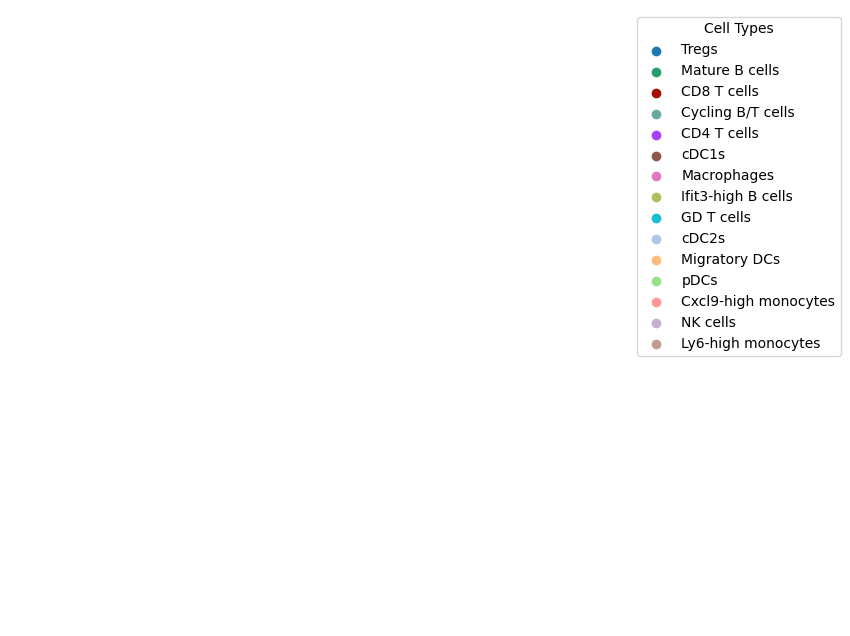

In [11]:
plt.figure(figsize=(8, 8))  # 可选，设置图像的大小

# 为每个细胞类型创建一个点
for cell_type, color in color_map.items():
    plt.scatter([], [], color=color, label=cell_type)  # 为空数据点创建图例

# 添加图例，分为两列
plt.legend(title="Cell Types", loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# 显示图像
plt.axis('off')  # 可选，关闭坐标轴
plt.savefig("D:/pythonplaces/MACD_github/img/dataset2/spatial_composition_plots_cdADDA_tuli.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have 7 datasets, such as:
# composition_data1, composition_data2, ..., composition_data7
# For simplicity, let's assume these are stored in a list.
composition_data_files = [
    'D:\pythonplaces\MACD_github\Baselines\Tangram\Result\dataset2\Tangram_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Stereoscope\Result\dataset2\Stereoscope_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Spoint\Result\dataset2\proportion.csv',
    'D:\pythonplaces\MACD_github\Baselines\SpaOTsc-master\Result\dataset2\SpaOTsc_decon.csv',
    'D:\pythonplaces\MACD_github\Baselines\scpDeconv\Result\dataset2/final_preds.csv',
    'D:\pythonplaces\MACD_github\Baselines/novoSpaRc\Result\dataset2/novoSpaRc_decon.csv',
    'D:\pythonplaces\MACD_github\Baselines\DestVi\Result\dataset2\DestVI_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Cell2location\Result\dataset2\Cell2location_result2.csv'
]
title=['Tangram','Stereoscope','Spoint','SpaOTsc','scp','novoSpaRc','DestVi','Cell2location']
# Create a 2x4 grid for the plots (2 rows, 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(120, 60))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each of the 7 datasets and plot the composition
for i, composition_data_file in enumerate(composition_data_files):
    # Load the dataset
    composition_data = pd.read_csv(composition_data_file)
    
    # Extract the cell type columns (assuming the first column is not a cell type)
    cell_type_columns = composition_data.columns[1:]
    # Combine composition data and coordinates
    merged_data = pd.concat([composition_data, coords], axis=1)
    
    # Get the current axis (subplot) where this plot will go
    ax = axes[i]
    # Loop through each spot and plot the composition as colored points
    for j, row in merged_data.iterrows():
        # Get the (x, y) coordinates
        x, y = row['y'], row['x']
        # Get cell type proportions for the spot
        proportions = row[cell_type_columns].values * 100
        
        # Extract cell types (should avoid 'Unnamed: 0' or any non-cell type columns)
        cell_types_in_row = row[cell_type_columns].index  # This should match cell types
        
        # Ensure we only use valid cell types
        valid_cell_types = [cell_type for cell_type in cell_types_in_row if cell_type in color_map]
        
        # Map each valid cell type to its corresponding color
        pie_colors = [color_map[cell_type] for cell_type in valid_cell_types]
        
        # Plot the pie chart on the current axis
        ax.pie(proportions, center=(x, y), radius=0.5, colors=pie_colors)
    
    # Set properties for the current subplot
    ax.set_aspect('equal')
    ax.set_xlim(merged_data['x'].min() - 1, merged_data['x'].max() + 1)
    ax.set_ylim(merged_data['y'].min() - 1, merged_data['y'].max() + 1)
    ax.set_title(title[i], fontsize=20)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset2/spatial_composition_plots.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()


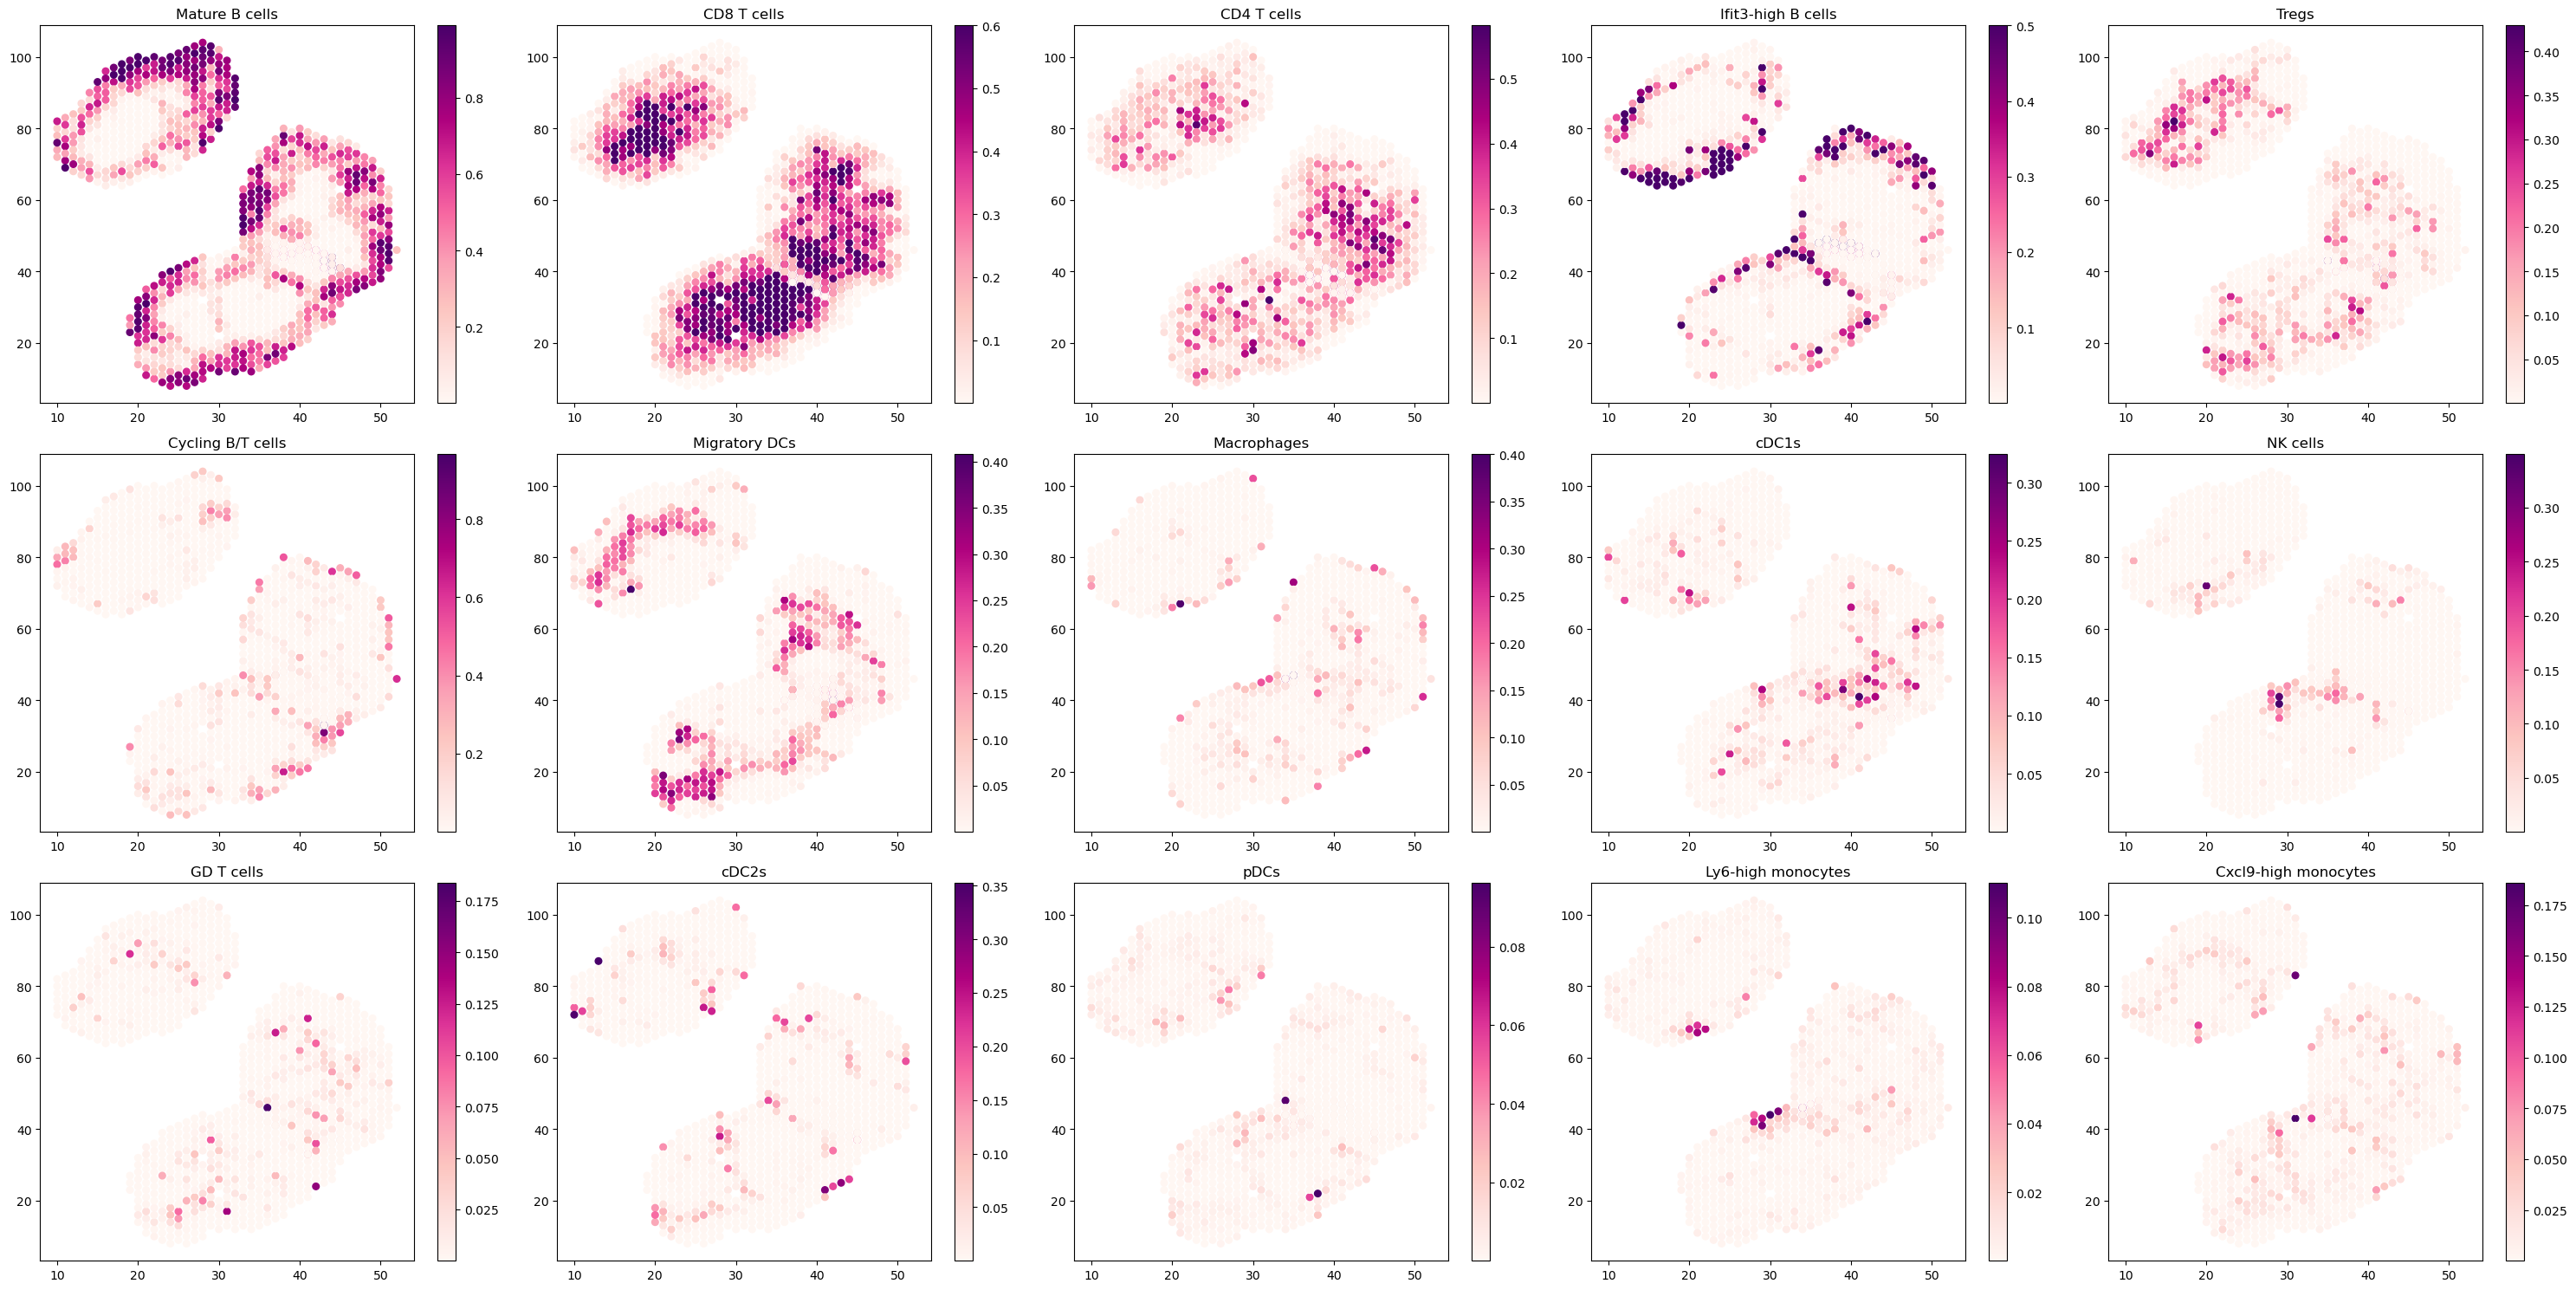

In [12]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset2/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)

# Get the spatial coordinates
x_coordinates = np.array(stadata.obs['array_row'])
y_coordinates = np.array(stadata.obs['array_col'])

# Load the results (expression values for different cell types)
file_path = 'D:/pythonplaces/MACD_github/MACD1/Result/dataset2/final_pro.csv'
result_df = pd.read_csv(file_path)

# Assuming columns in result_df represent different cell types
celltypes = result_df.columns[1:]

# Define titles for the subplots (use the same names as celltypes or custom titles)
titles = [f"{celltypes[i]}" for i in range(len(celltypes))]

# Create a 2x5 layout for plotting
fig, axes = plt.subplots(3, 5, figsize=(30, 15))

# Loop over each cell type and plot its expression
for i, celltype in enumerate(celltypes):
    celltype_expression = result_df[celltype].values  # Extract expression values for the current celltype

    ax = axes[i // 5, i % 5]  # 2x5 layout

    # Adjust vmax and vmin based on conditions or experiment
    if i == 1:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30, vmax=0.6)
    elif i == 3:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30, vmax=0.5)
    # 
    elif i ==7:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30, vmax=0.4)
    # elif i >= 2 and i <= 7:
    #     scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30, vmax=0.4)
    # elif i == 11:
    #     scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30, vmax=0.4)
    else:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30)

    ax.set_title(titles[i])  # Set title for each subplot

    # Add colorbar to the side of each subplot
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout to prevent overlap and save the plot
plt.tight_layout()

# Save the figure as a PDF file
output_path = "D:/pythonplaces/MACD_github/img/dataset2/result_all.pdf"
plt.savefig(output_path, format="pdf", bbox_inches="tight")

# Display the plot
plt.show()


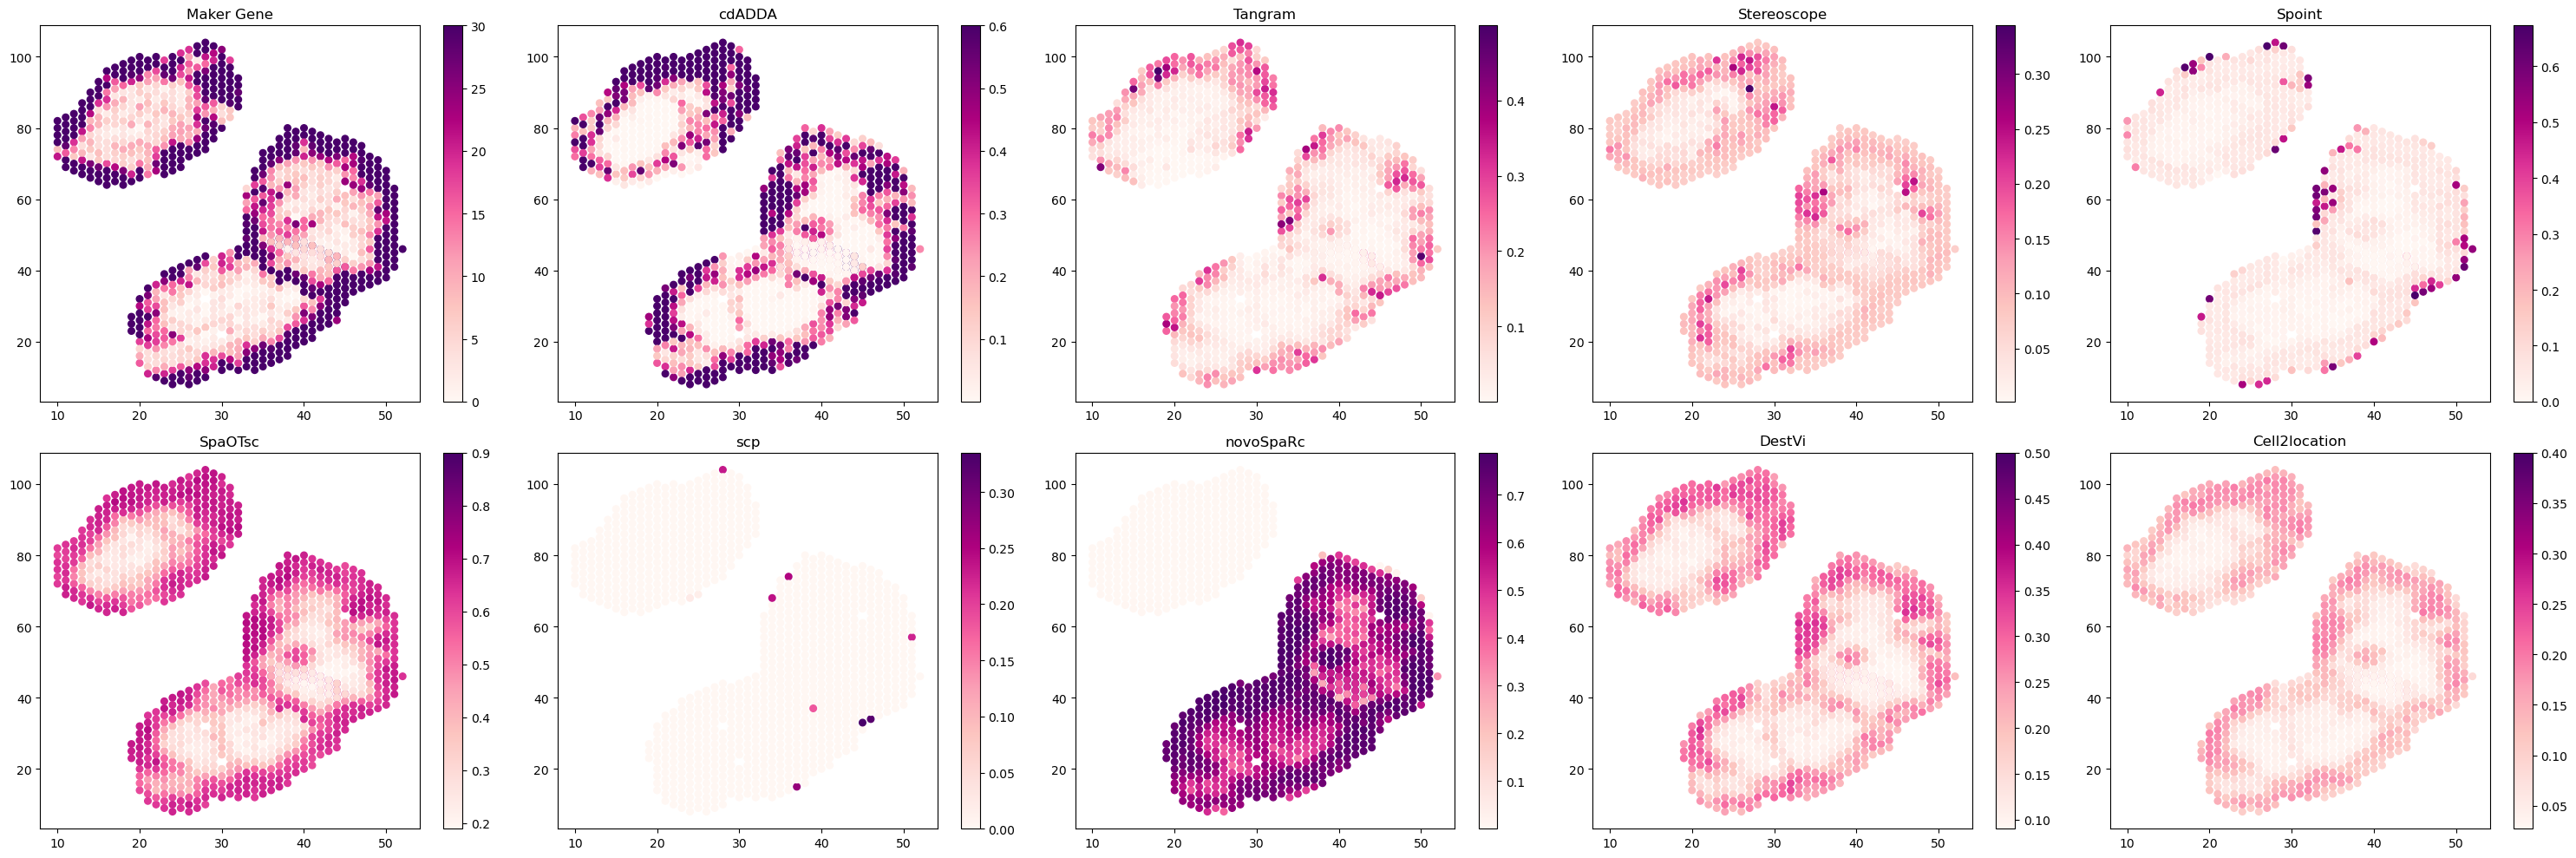

In [16]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset2/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
# Coordinates and gene of interest'Atrial_cardiomyocytes': ['MYH6'],
genes_of_interest = ['Cd79a']
celltype = ['Mature B cells']
x_coordinates = np.array(stadata.obs['array_row'])
y_coordinates = np.array(stadata.obs['array_col'])

# Create 2x5 layout for plotting
fig, axes = plt.subplots(2, 5, figsize=(30, 10))

# List of results (example paths; replace with actual paths)
composition_data_files = [
    "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset2/Real_STdata_filter.h5ad",
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset2/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset2/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset2/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset2/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset2/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset2/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset2/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset2/DestVI_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Cell2location\Result\dataset2\Cell2location_result2.csv'
]
titles = [ 'Maker Gene','cdADDA', 'Tangram', 'Stereoscope', 'Spoint',
    'SpaOTsc', 'scp', 'novoSpaRc', 'DestVi', 'Cell2location'
]

for i, file_path in enumerate(composition_data_files):
    # Load the result for the ith method 
    if i==0:
        celltype_expression=stadata[:, genes_of_interest].X.toarray()
    else:
        result_df = pd.read_csv(file_path)
        if 'Mature B cells' in result_df.columns:
           celltype_expression = result_df['Mature B cells'].values
        

    # Plot for the corresponding method
    ax = axes[i // 5, i % 5]  # 2x5 layout
    if i==0:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=30)
    elif i==1:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.6)
    elif i==5:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.9)
    elif i==8:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.5)
    elif i==9:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.4)
    else:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30)
    ax.set_title(titles[i])
    # Add colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset2/result.pdf", format="pdf", bbox_inches="tight")
plt.show()


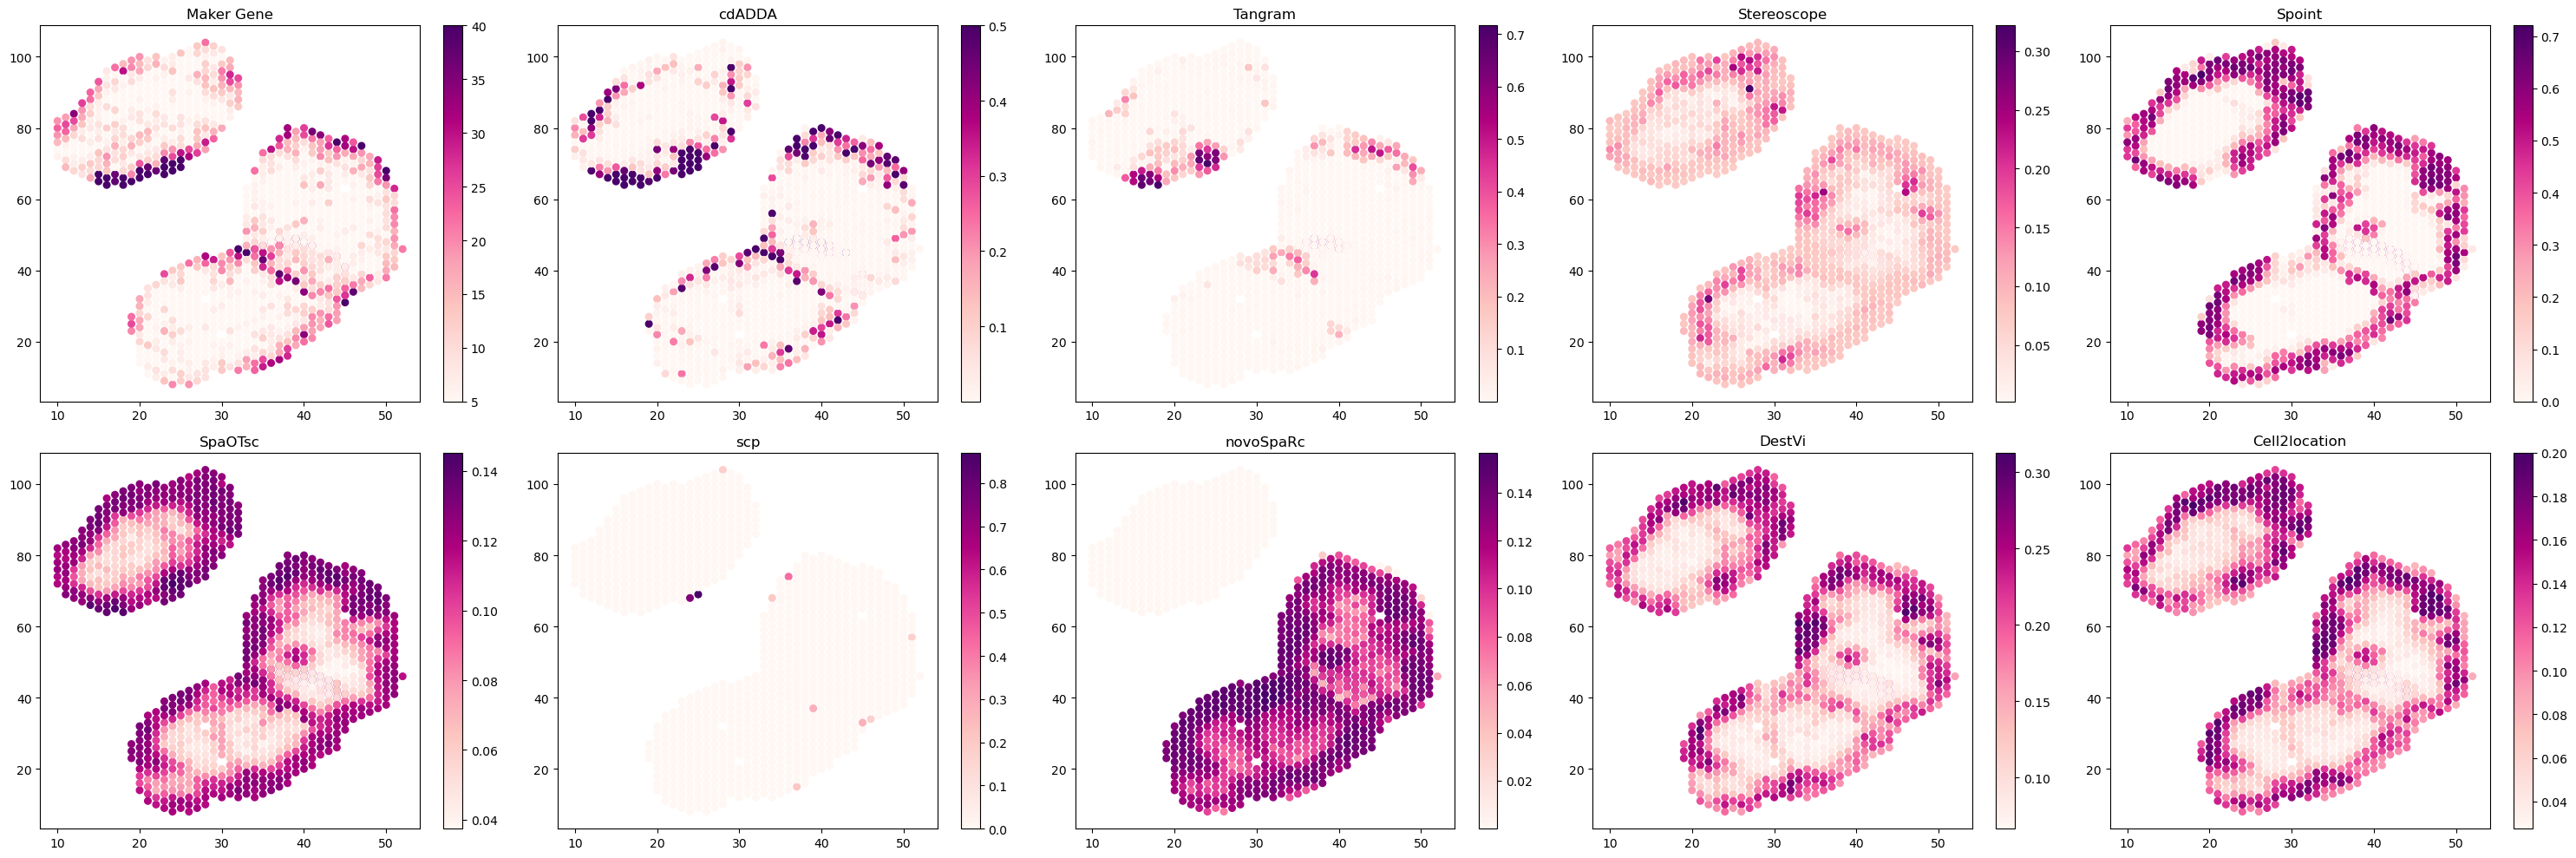

In [21]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset2/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
# Coordinates and gene of interest'Atrial_cardiomyocytes': ['MYH6'],
genes_of_interest = ['Ly6a']
celltype = ['Cxcl9-high monocytes']
x_coordinates = np.array(stadata.obs['array_row'])
y_coordinates = np.array(stadata.obs['array_col'])

# Create 2x5 layout for plotting
fig, axes = plt.subplots(2, 5, figsize=(30, 10))

# List of results (example paths; replace with actual paths)
composition_data_files = [
    "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset2/Real_STdata_filter.h5ad",
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset2/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset2/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset2/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset2/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset2/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset2/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset2/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset2/DestVI_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Cell2location\Result\dataset2\Cell2location_result2.csv'
]
titles = [ 'Maker Gene','cdADDA', 'Tangram', 'Stereoscope', 'Spoint',
    'SpaOTsc', 'scp', 'novoSpaRc', 'DestVi', 'Cell2location'
]

for i, file_path in enumerate(composition_data_files):
    # Load the result for the ith method 
    if i==0:
        celltype_expression=stadata[:, genes_of_interest].X.toarray()
    else:
        result_df = pd.read_csv(file_path)
        if 'Ifit3-high B cells' in result_df.columns:
           celltype_expression = result_df['Ifit3-high B cells'].values
        

    # Plot for the corresponding method
    ax = axes[i // 5, i % 5]  # 2x5 layout
    if i==1:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.5)
    elif i==0:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=40,vmin=5)
    else:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30)
    ax.set_title(titles[i])
    # Add colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset2/result1.pdf", format="pdf", bbox_inches="tight")
plt.show()


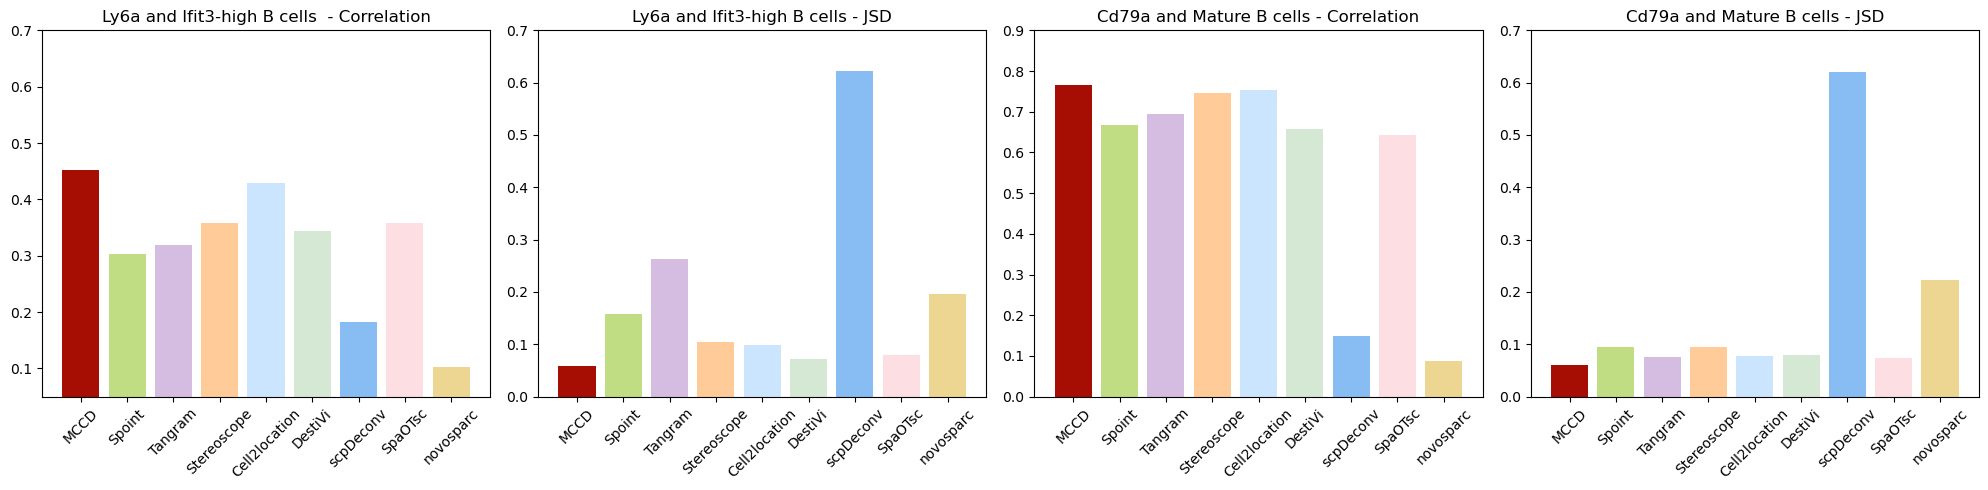

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 定义数据
methods = ['MCCD','Spoint','Tangram', 'Stereoscope', 'Cell2location', 'DestiVi', 'scpDeconv','SpaOTsc','novosparc' ]
corr_values_1 = [0.4518,0.3036,0.3184,0.3586,0.4284,0.3435,0.182,0.3582,0.102]
jsd_values_1 = [0.0579,0.1578,0.2628,0.104,0.0981,0.0728,0.6229,0.079,0.1968]

corr_values_2 = [0.7645,0.6672,0.6937,0.7452,0.7527,0.6575,0.1499,0.6434,0.087]
jsd_values_2 = [0.0606,0.095,0.075,0.095,0.0769,0.0799,0.6205,0.074,0.223]

# 创建数据框
data_1 = {'Methods': methods, 'Correlation': corr_values_1, 'JSD': jsd_values_1}
data_2 = {'Methods': methods, 'Correlation': corr_values_2, 'JSD': jsd_values_2}

df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)
colors = [
        "#A60D03", "#C0DD83", "#D5BCE1", "#FFCC99",
        "#CCE5FF",  "#D5E8D4", "#87BDF2",
        "#FDDEE3", "#EDD691", "#A068A1"
    ]
# colors=['#219723','#4889F1','#76608A','#FA6800','#A0522D','#1BA1E2','#647687']
# 设置图形大小
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 绘制第一个矩阵
axes[0].bar(df_1['Methods'], df_1['Correlation'], color=colors)
axes[0].set_title('Ly6a and Ifit3-high B cells  - Correlation')
axes[0].set_ylim(0.05, 0.7)
axes[0].tick_params(axis='x', rotation=45)

# 绘制第二个矩阵
axes[1].bar(df_1['Methods'], df_1['JSD'], color=colors)
axes[1].set_title('Ly6a and Ifit3-high B cells - JSD')
axes[1].set_ylim(0, 0.7)
axes[1].tick_params(axis='x', rotation=45)

# 绘制第三个矩阵
axes[2].bar(df_2['Methods'], df_2['Correlation'], color=colors)
axes[2].set_title('Cd79a and Mature B cells - Correlation')
axes[2].set_ylim(0, 0.9)
axes[2].tick_params(axis='x', rotation=45)

# 绘制第四个矩阵
axes[3].bar(df_2['Methods'], df_2['JSD'], color=colors)
axes[3].set_title('Cd79a and Mature B cells - JSD')
axes[3].set_ylim(0, 0.7)
axes[3].tick_params(axis='x', rotation=45)
for ax in axes:
    ax.grid(False)

# 调整子图间距
plt.tight_layout()
# 保存图像
plt.savefig("D:\pythonplaces\MACD_github\img\dataset2/result4.pdf", format="pdf", bbox_inches="tight")

# 显示图像
plt.show()

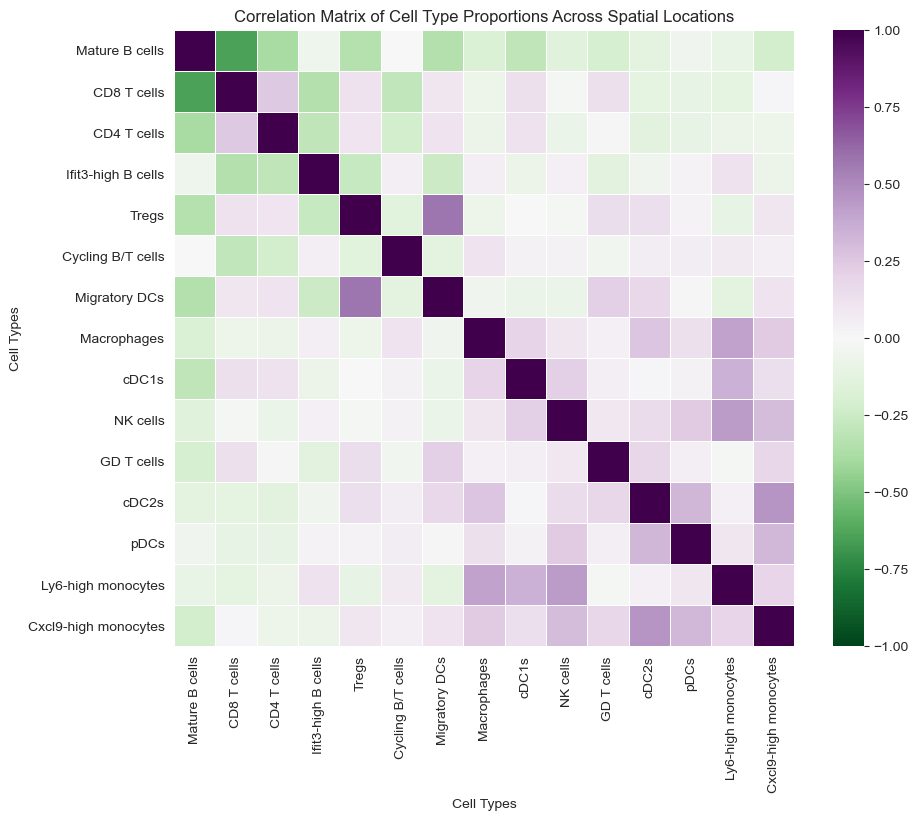

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# 读取细胞组成和坐标数据
file_path = 'D:/pythonplaces/MACD_github/MACD1/Result/dataset2/final_pro.csv'
result_df = pd.read_csv(file_path)

# 获取细胞类型列表（假设第一列是ID或坐标，剩下的列是细胞类型的丰度）
celltypes = result_df.columns[1:]  # 假设第一列是非丰度数据（如spot ID）

# 获取每个spot的细胞类型丰度数据
cell_abundance = result_df.iloc[:, 1:].values  # 提取细胞类型丰度矩阵

# ----------- 计算细胞类型之间的相关性 -----------

# 初始化一个相关性矩阵
correlation_matrix = np.zeros((len(celltypes), len(celltypes)))

# 计算细胞类型之间的相关性（使用Pearson相关系数）
for i, cell_type_1 in enumerate(celltypes):
    for j, cell_type_2 in enumerate(celltypes):
        # 获取两种细胞类型在所有采样点的丰度
        abundance_1 = cell_abundance[:, i]
        abundance_2 = cell_abundance[:, j]
        
        # 计算皮尔逊相关系数
        corr, _ = pearsonr(abundance_1, abundance_2)
        correlation_matrix[i, j] = corr

# 将相关性矩阵转化为DataFrame以便可视化
correlation_df = pd.DataFrame(correlation_matrix, index=celltypes, columns=celltypes)

# ----------- 可视化相关性矩阵 -----------

plt.figure(figsize=(10, 8))

# 使用seaborn的heatmap绘制热图
sns.heatmap(correlation_df, annot=False, cmap="PRGn_r", vmin=-1, vmax=1, center=0, linewidths=0.5)

# 添加标题
plt.title("Correlation Matrix of Cell Type Proportions Across Spatial Locations")
plt.xlabel("Cell Types")
plt.ylabel("Cell Types")
output_path = "D:/pythonplaces/MACD_github/img/dataset2/heatmap1.pdf"
plt.savefig(output_path, format="pdf", bbox_inches="tight")
plt.show()


<Figure size 1000x800 with 0 Axes>

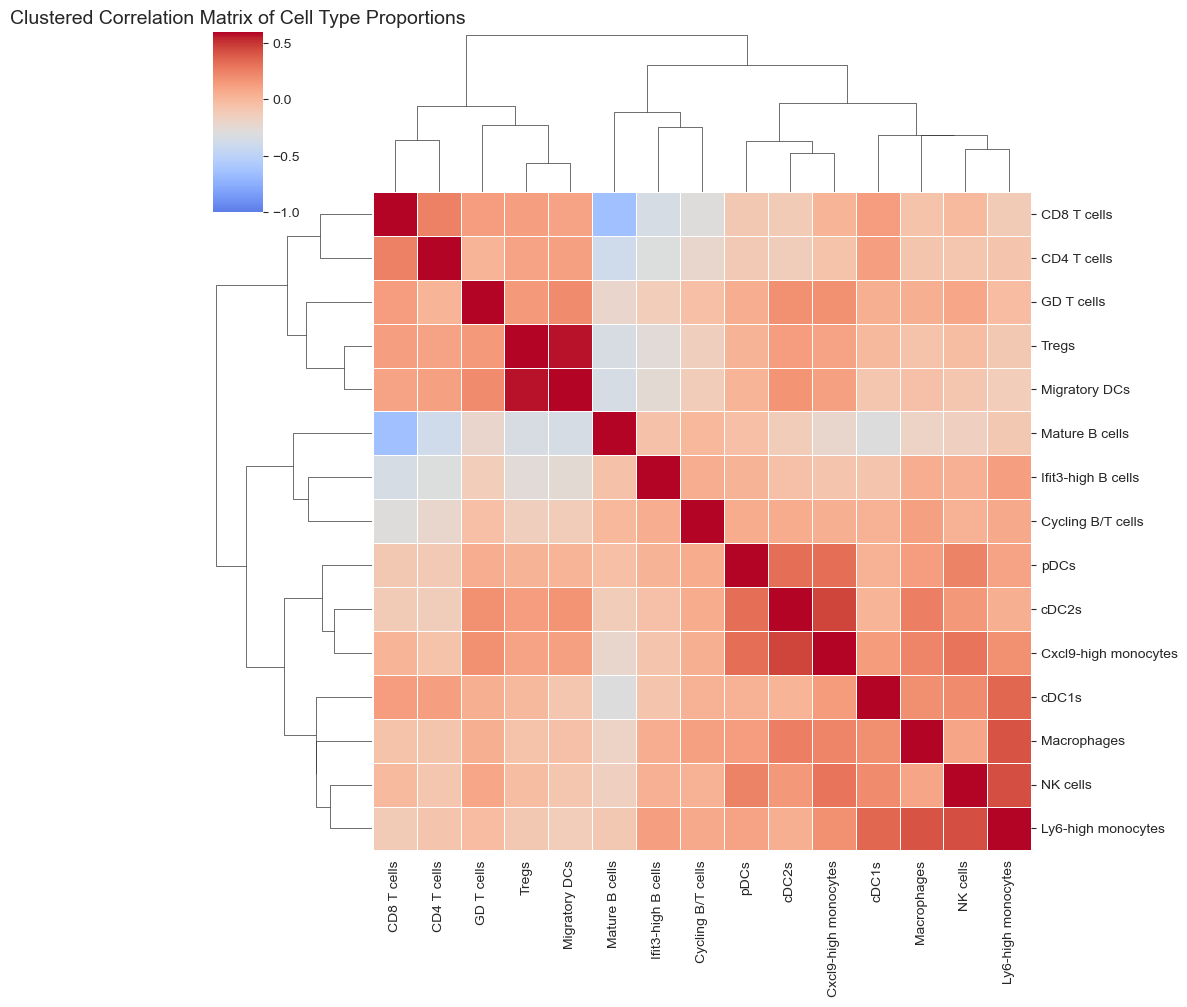

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 读取细胞组成和坐标数据
file_path = 'D:/pythonplaces/MACD_github/MACD1/Result/dataset2/final_pro.csv'
result_df = pd.read_csv(file_path)

# 获取细胞类型列表（假设第一列是ID或坐标，剩下的列是细胞类型的丰度）
celltypes = result_df.columns[1:]  # 第一列假设是非丰度数据（如spot ID）

# 获取每个spot的细胞类型丰度数据
cell_abundance = result_df.iloc[:, 1:].values  # 细胞类型丰度矩阵

# ----------- 计算细胞类型之间的相关性 -----------
# 初始化相关性矩阵
correlation_matrix = np.zeros((len(celltypes), len(celltypes)))

# 计算细胞类型之间的相关性（使用 Pearson 相关系数）
for i, cell_type_1 in enumerate(celltypes):
    for j, cell_type_2 in enumerate(celltypes):
        # if i == j:
        #     correlation_matrix[i, j] = 0  # 对角线设为 0
        # else:
            # 获取两种细胞类型在所有采样点的丰度
            abundance_1 = cell_abundance[:, i]
            abundance_2 = cell_abundance[:, j]

            # 计算皮尔逊相关系数
            corr, _ = pearsonr(abundance_1, abundance_2)
            correlation_matrix[i, j] = corr

# 转换为 DataFrame 方便可视化
correlation_df = pd.DataFrame(correlation_matrix, index=celltypes, columns=celltypes)

# ----------- 进行层次聚类并可视化 -----------
plt.figure(figsize=(10, 8))

# 使用 seaborn.clustermap 进行聚类
clustergrid = sns.clustermap(
    correlation_df, 
    method='ward',  # 使用 Ward 层次聚类方法
    metric='euclidean',  # 使用欧几里得距离进行聚类
    cmap="coolwarm",  # 颜色映射
    vmin=-1, vmax=0.6, center=-0.3,  # 颜色范围
    linewidths=0.5,  # 热图边框线宽
    figsize=(10, 10)  # 画布大小
)

# 添加标题
plt.title("Clustered Correlation Matrix of Cell Type Proportions", fontsize=14)

# 保存聚类热图
output_path = "D:/pythonplaces/MACD_github/img/dataset2/heatmap_clustered.pdf"
plt.savefig(output_path, format="pdf", bbox_inches="tight")

# 显示图像
plt.show()
